## 미니프로젝트

* 개요
        기업이 성공하기 위해서는 기업의 기능인 생산, 물류, 마케팅, 인사관리 등의 활동이 체계적으로 정의되어야 한다. 이러한 활동이 마련되기 위해서는 기업의 초기 투자가 원활하게 이루어져야 하지만 투자자들은 어떤 스타트업에 투자를 해야 하는지에 대한 정보가 부족하다. 스타트업의 성공을 예측하면 투자자는 빠른 성장 잠재력을 가진 회사를 찾아 투자를 하고, 스타트업은 기하급수적으로 성장할 수 있을 것이다. 성공한 스타트업과 실패한 스타트업의 데이터를 분석하여 투자자에게 스타트업의 성공 예측 여부에 대한 정보를 제공한다면, 스타트업의 초기 투자가 원활하게 이루어질 수 있을 것이다.
        
* 활용 데이터
        - 투자 관리 회사인 GMO - startup data.csv
        - 923 rows x 49 columns
        
* 기대효과
        본 실험을 통해 스타트업의 초기 시장진출 성공을 좌우하는 변수는 어떤 것이 있는지 알 수 있다. 또한, 스타트업에 투자를 원하는 투자자에게 성공에 대한 예측 정보를 제공하면서 도움을 줄 수 있을 것이다. 스타트업은 초기 투자 유치가 원활하게 이루어져 자금이 확보되면, 안정적인 기업으로 성장할 수 있는 기반이 마련된다. 
        스타트업이 유니콘 기업으로 성장하면서, 새로운 경제 성장과 고용창출이 일어나 경제 발전에 도움이 될 것이다.

In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## 데이터 전처리

In [2]:
startup = pd.read_csv("startup data.csv")
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

- 기업에 대한 일반적인 정보와 관련된 열 삭제

In [4]:
startup.drop(["Unnamed: 0"], axis = 1, inplace = True) #일련번호
startup.drop(["state_code"], axis = 1, inplace = True) #지역
startup.drop(["latitude"], axis = 1, inplace = True) #위도
startup.drop(["longitude"], axis = 1, inplace = True) #경도
startup.drop(["zip_code"], axis = 1, inplace = True) #코드
startup.drop(["id"], axis = 1, inplace = True) #id
startup.drop(["city"], axis = 1, inplace = True) #도시
startup.drop(["name"], axis = 1, inplace = True) #기업이름
startup.drop(["founded_at"], axis = 1, inplace = True) #설립일
startup.drop(["first_funding_at"], axis = 1, inplace = True) #첫 투자
startup.drop(["last_funding_at"], axis = 1, inplace = True) #마지막 투자
startup.drop(["category_code"], axis = 1, inplace = True) #카테고리
startup.drop(["object_id"], axis = 1, inplace = True) #id

- 결측값이 있는 열 삭제

In [5]:
print(startup.isnull().sum())
startup = startup.dropna(axis = 1)

Unnamed: 6                  493
labels                        0
closed_at                   588
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roun

In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   labels                  923 non-null    int64  
 1   age_first_funding_year  923 non-null    float64
 2   age_last_funding_year   923 non-null    float64
 3   relationships           923 non-null    int64  
 4   funding_rounds          923 non-null    int64  
 5   funding_total_usd       923 non-null    int64  
 6   milestones              923 non-null    int64  
 7   is_CA                   923 non-null    int64  
 8   is_NY                   923 non-null    int64  
 9   is_MA                   923 non-null    int64  
 10  is_TX                   923 non-null    int64  
 11  is_otherstate           923 non-null    int64  
 12  is_software             923 non-null    int64  
 13  is_web                  923 non-null    int64  
 14  is_mobile               923 non-null    in

## 설명력이 높은 변수(열) 선정

- numeric 칼럼의 연관분석

In [8]:
# status 열 치환
startup["status"] = startup.status.map({'acquired': 1, "closed": 0})

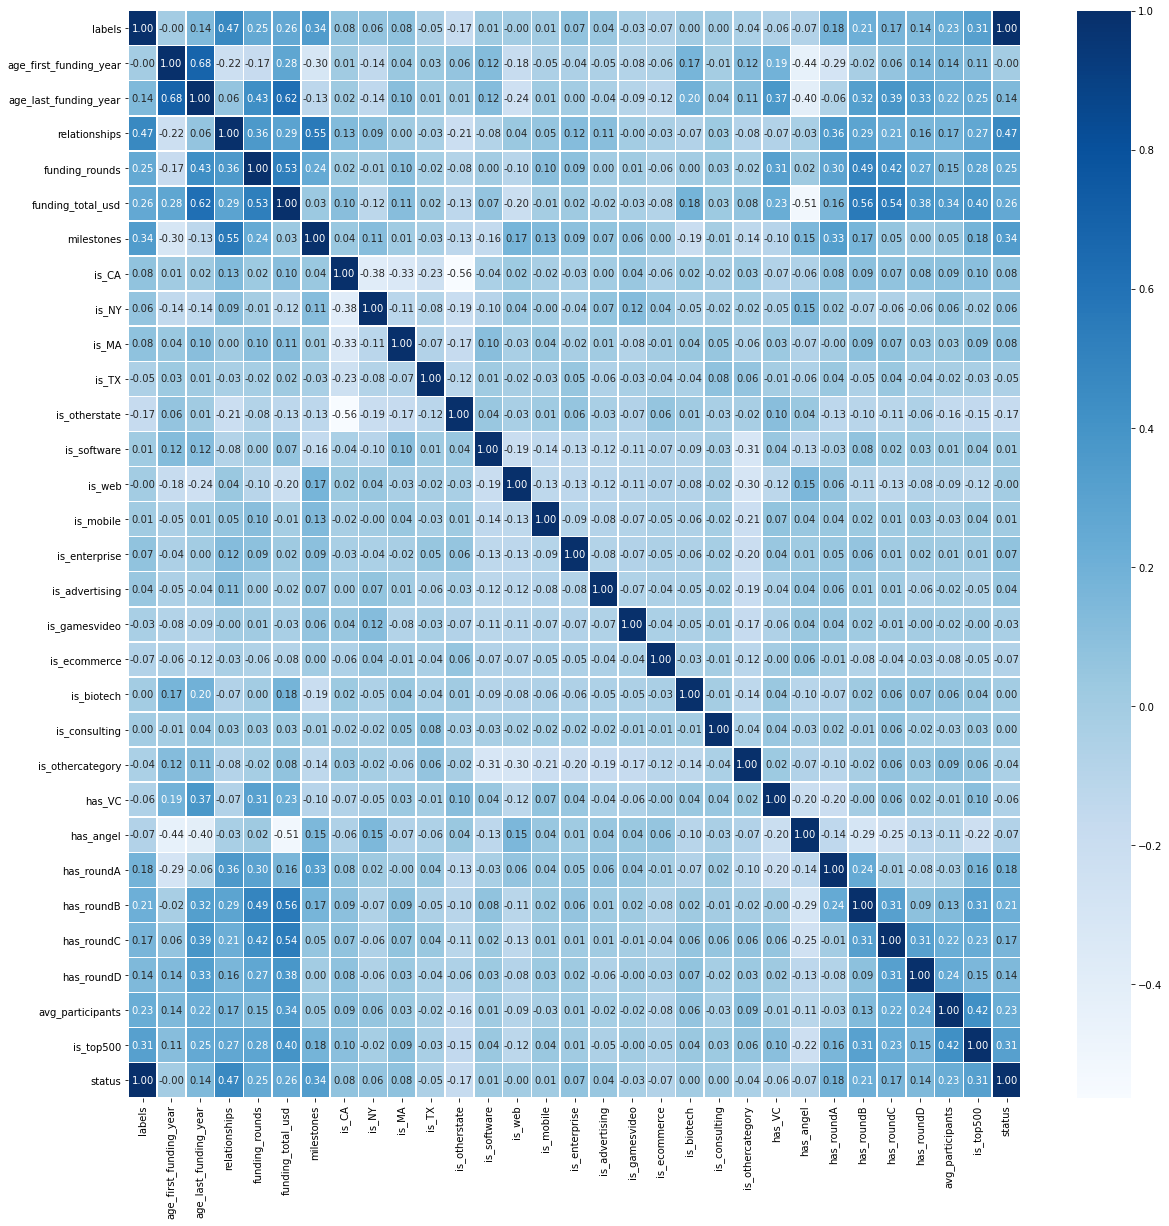

In [9]:
def draw_heatmap(startup):
    
    
    f, ax = plt.subplots(figsize = (20, 20))
    
    corrMatt = startup.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, cmap = 'Blues', fmt = '.2f')
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical=startup.select_dtypes(numerics)
numerical_column = startup.select_dtypes(numerics).columns

draw_heatmap(numerical)

- numeric type의 변수들과 status 변수 사이의 상관분석

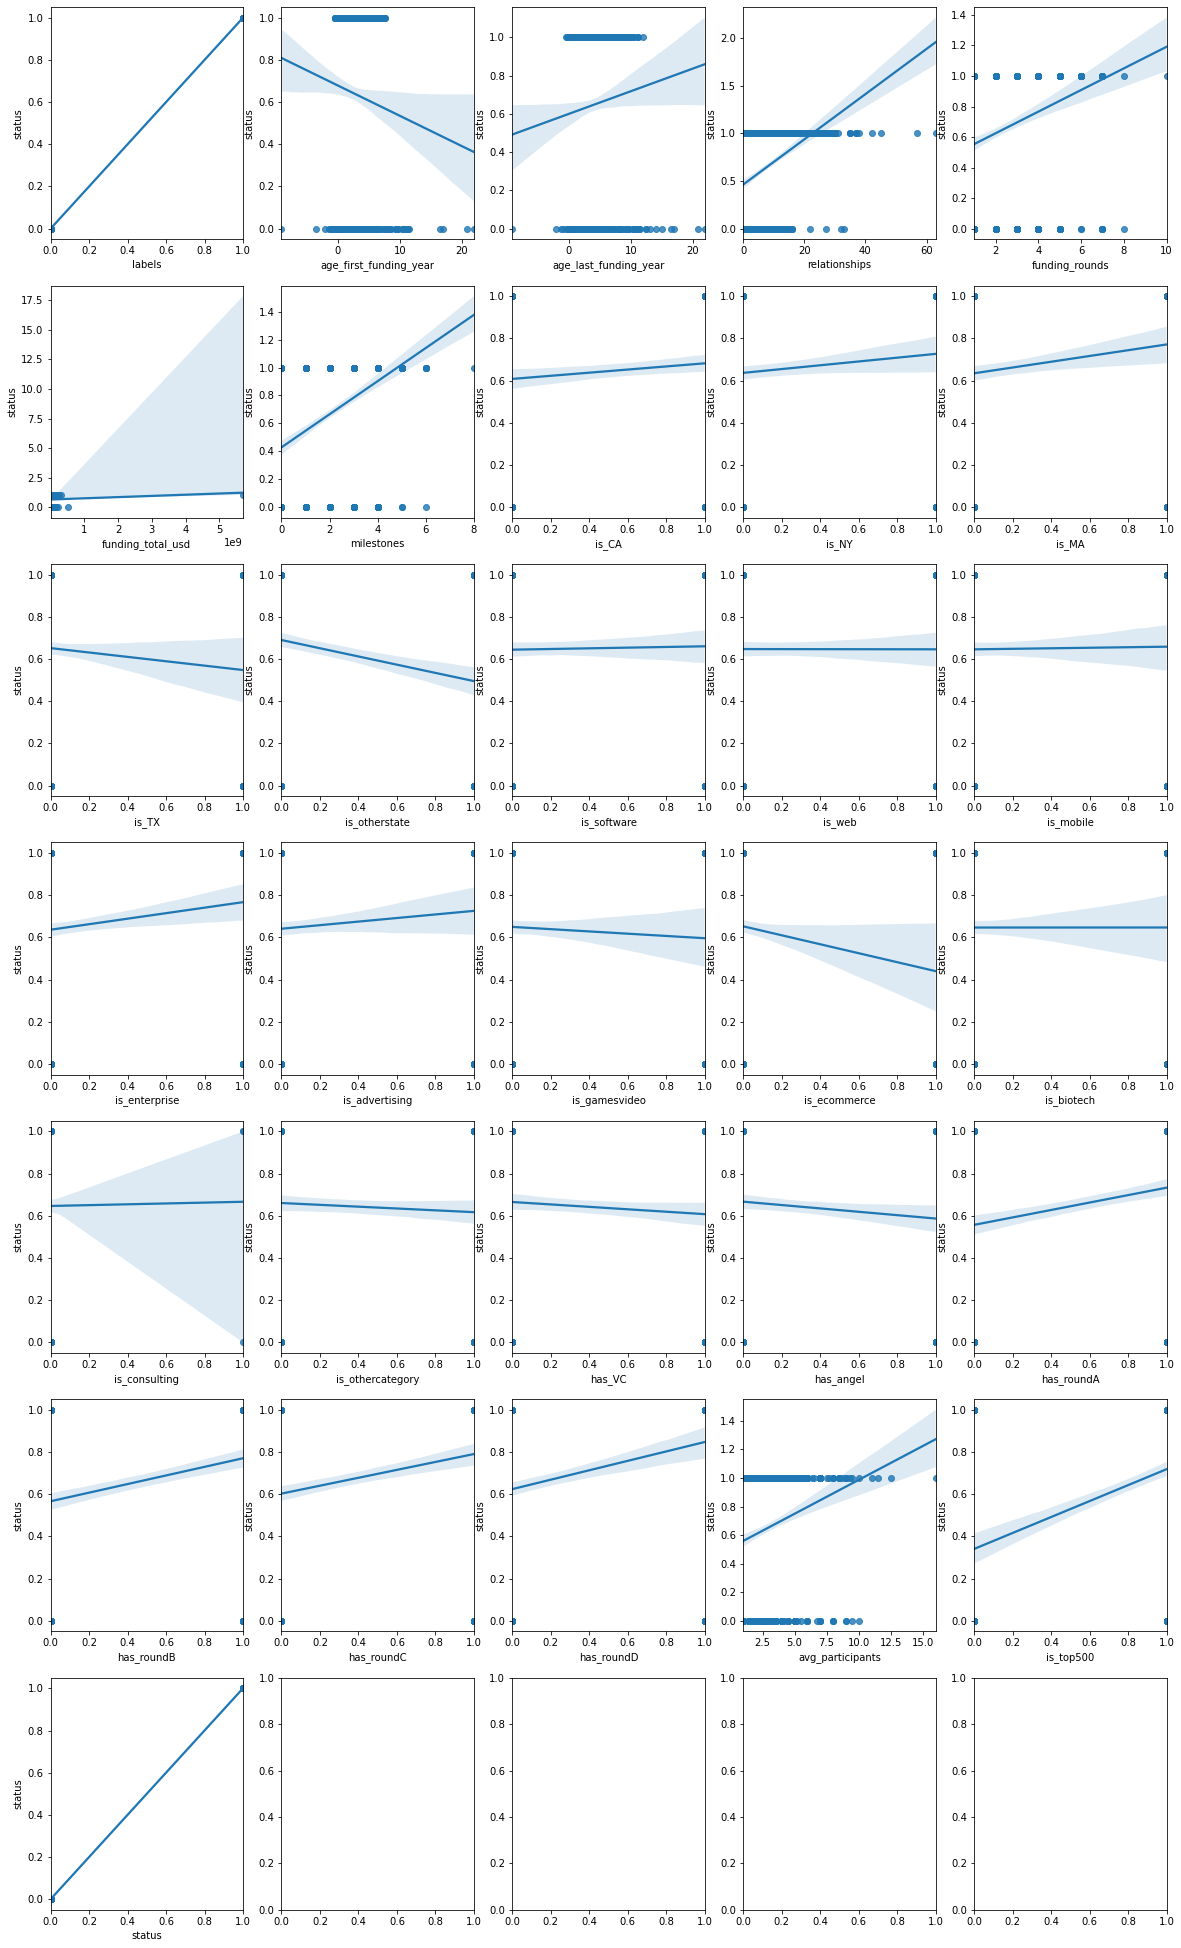

In [10]:
fig, axs = plt.subplots(figsize = (20, 35), ncols = 5, nrows = 7)
for i, feature in enumerate(startup.columns):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y="status", data=startup, ax=axs[row][col])

- 강한 상관관계가 있다고 판단되는 변수

    age_first_funding_year, age_last_funding_year, relationships, funding_rounds, is_ecommerce, milestones, avg_participants, is_top500

In [12]:
startup = startup.loc[:, ['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'is_ecommerce', 'milestones', 'avg_participants', 'is_top500', 'status']]
startup.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,is_ecommerce,milestones,avg_participants,is_top500,status
0,2.2493,3.0027,3,3,0,3,1.0000,0,1
1,5.1260,9.9973,9,4,0,1,4.7500,1,1
2,1.0329,1.0329,5,1,0,2,4.0000,1,1
3,3.1315,5.3151,5,3,0,1,3.3333,1,1
4,0.0000,1.6685,2,2,0,1,1.0000,1,0


- 변수설명
    - age_first_funding_year: 첫 투자를 받은 시기
    - age_last_funding_year: 마지막 투자를 받은 시기
    - relationships: 파트너 기업의 수
    - funding_rounds: 자금 조달 회차
    - is_ecommerce: 전자상거래 여부
    - milestones: 획기적인 사건의 수
    - avg_participants: 평균적인 참가자의 수
    - is_top500: top500 여부
    - status: 성공여부

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("coolwarm", 10)

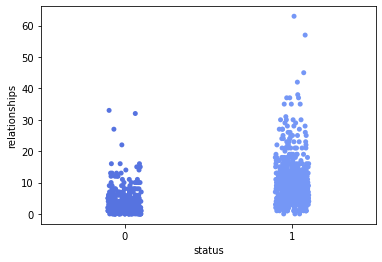

In [26]:
sns.stripplot(y = startup['relationships'], x = startup['status'], palette=colors)

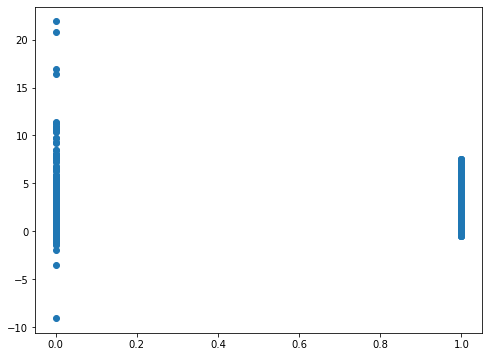

In [84]:
plt.figure(figsize = (8, 6))
plt.scatter(startup["status"], startup["age_first_funding_year"])
plt.show()

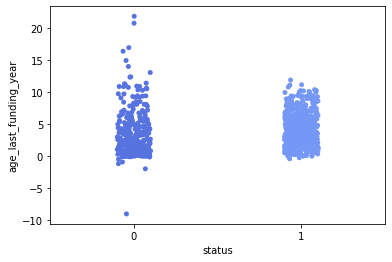

In [27]:
sns.stripplot(y = startup['age_last_funding_year'], x = startup['status'],palette=colors)

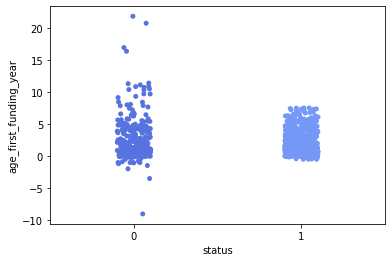

In [85]:
sns.stripplot(y = startup['age_first_funding_year'], x = startup['status'], palette=colors)

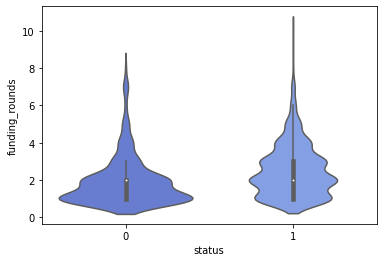

In [86]:
sns.violinplot(y = startup['funding_rounds'], x = startup['status'],palette=colors)

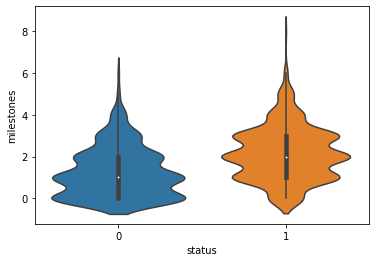

In [46]:
sns.violinplot(y = startup['milestones'], x = startup['status'])

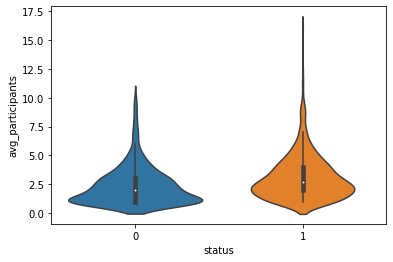

In [49]:
sns.violinplot(y = startup['avg_participants'], x = startup['status'])

In [79]:
import pandas as pd
top500_no_0 = len(startup[(startup['is_top500'] == 0) & (startup['status'] == 0)].index)
top500_no_1 = len(startup[(startup['is_top500'] == 0) & (startup['status'] == 1)].index)
top500_yes_0 = len(startup[(startup['is_top500'] == 1) & (startup['status'] == 0)].index)
top500_yes_1 = len(startup[(startup['is_top500'] == 1) & (startup['status'] == 1)].index)

top500 = pd.DataFrame({"top500_no_0" : [top500_no_0], 
                          "top500_no_1" : [top500_no_1], 
                          "top500_yes_0" : [top500_yes_0],
                          "top500_yes_1" : [top500_yes_1]})

#ecommerce = DataFrame(ecommerce)
print(top500)

   top500_no_0  top500_no_1  top500_yes_0  top500_yes_1
0          116           60           210           537


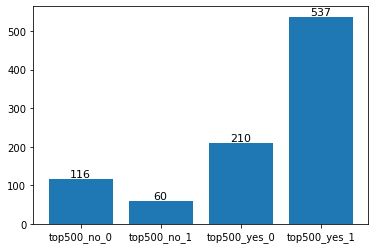

In [88]:
x = ["top500_no_0","top500_no_1","top500_yes_0", "top500_yes_1"]
y = [top500_no_0, top500_no_1, top500_yes_0, top500_yes_1]

plt.bar(x, y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
            fontsize = 11,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "bottom")

plt.show()

In [80]:
ecommerce_no_0 = len(startup[(startup['is_ecommerce'] == 0) & (startup['status'] == 0)].index)
ecommerce_no_1 = len(startup[(startup['is_ecommerce'] == 0) & (startup['status'] == 1)].index)
ecommerce_yes_0 = len(startup[(startup['is_ecommerce'] == 1) & (startup['status'] == 0)].index)
ecommerce_yes_1 = len(startup[(startup['is_ecommerce'] == 1) & (startup['status'] == 1)].index)

ecommerce = pd.DataFrame({"ecommerce_no_0" : [ecommerce_no_0], 
                          "ecommerce_no_1" : [ecommerce_no_1], 
                          "ecommerce_yes_0" : [ecommerce_yes_0],
                          "ecommerce_yes_1" : [ecommerce_yes_1]})

#ecommerce = DataFrame(ecommerce)
print(ecommerce)

   ecommerce_no_0  ecommerce_no_1  ecommerce_yes_0  ecommerce_yes_1
0             312             586               14               11


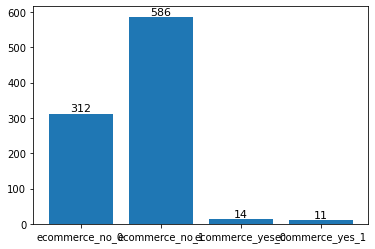

In [87]:
x = ["ecommerce_no_0","ecommerce_no_1","ecommerce_yes_0", "ecommerce_yes_1"]
y = [ecommerce_no_0, ecommerce_no_1, ecommerce_yes_0, ecommerce_yes_1]

plt.bar(x, y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
            fontsize = 11,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "bottom")

plt.show()

- 로지스틱회귀분석

In [81]:
import statsmodels.api as sm

logitreg = sm.Logit(y_train, x_train)
logitreg_fit = logitreg.fit()

print(logitreg_fit.summary())

#print(np.exp(model.params))

Optimization terminated successfully.
         Current function value: 0.552603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  646
Model:                          Logit   Df Residuals:                      638
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.1464
Time:                        22:00:02   Log-Likelihood:                -356.98
converged:                       True   LL-Null:                       -418.19
Covariance Type:            nonrobust   LLR p-value:                 2.407e-23
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age_first_funding_year    -0.3070      0.087     -3.525      0.000      -0.478      

- 결과를 해석하면, 
    
    - 유의 수준이 0.05일 때 통계적으로 유의미한 변수는 relationships, milestones, avg_participants, is_top500 이다.
    - 

In [165]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   labels                  923 non-null    int64  
 1   age_first_funding_year  923 non-null    float64
 2   age_last_funding_year   923 non-null    float64
 3   relationships           923 non-null    int64  
 4   funding_rounds          923 non-null    int64  
 5   is_ecommerce            923 non-null    int64  
 6   milestones              923 non-null    int64  
 7   avg_participants        923 non-null    float64
 8   is_top500               923 non-null    int64  
 9   status                  923 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 72.2 KB


## 모델링

In [28]:
x = startup.iloc[:,:8]
y = startup.iloc[:, 8:]
# training set과 test set 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

- KNN

<ipython-input-18-64a50a785e02>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-18-64a50a785e02>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-18-64a50a785e02>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-18-64a50a785e02>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(x_train, y_train)
<ipython-input-18-64a50a785e02>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

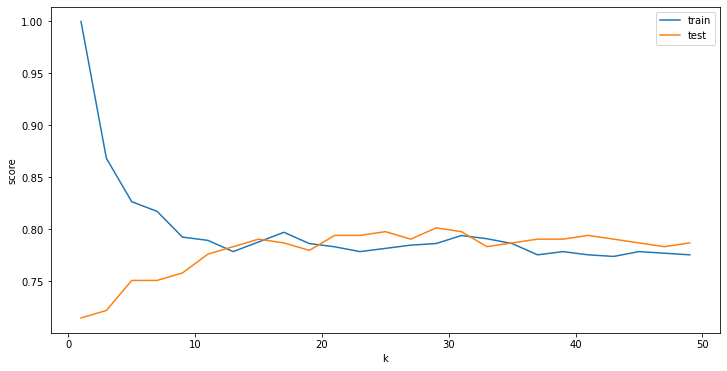

In [18]:
train_scores = []
test_scores = []

for k in range(1, 50,2):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (12, 6))
plt.plot(range(1,50, 2),train_scores, label = "train" )
plt.plot(range(1,50, 2),test_scores, label = "test" )
plt.legend()
plt.xlabel("k")
plt.ylabel("score")
plt.show()

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A col

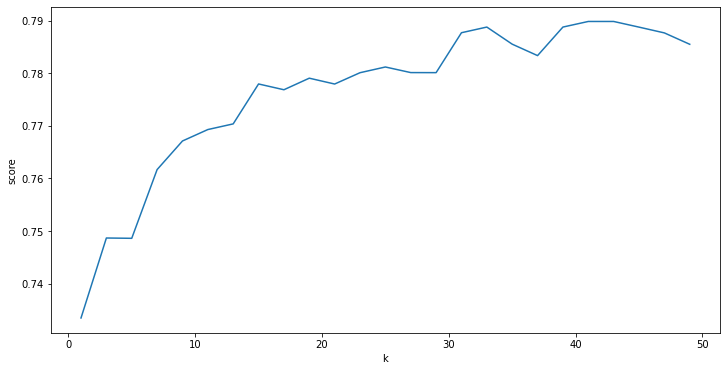

In [19]:
from sklearn.model_selection import cross_val_score

scores = []

for k in range(1, 50, 2):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, x, y, cv = 10, scoring = "accuracy")
    scores.append(score.mean())
    
plt.figure(figsize = (12, 6))
plt.plot(range(1,50,2), scores)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

lgm = LogisticRegression(random_state = 7054)
lgm.fit(x_train, y_train)
predict = lgm.predict(x_test)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(predict, y_test)

0.7725631768953068

In [46]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predict)

from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names = ["실패", "성공"]))

              precision    recall  f1-score   support

          실패       0.75      0.55      0.64       100
          성공       0.78      0.90      0.83       177

    accuracy                           0.77       277
   macro avg       0.77      0.72      0.74       277
weighted avg       0.77      0.77      0.76       277



In [44]:
cm = confusion_matrix(y_test, predict)
cm

array([[ 55,  45],
       [ 18, 159]], dtype=int64)

0이라고 예측한 데이터의 75%만 실제로 0이었고 1이라고 예측한 데이터의 78%만 실제로 1이었음을 알 수 있습니다. 또한, 실제로 0인 데이터 중의 55%만 0으로 판별되었고 실제로 1인 데이터 중의 90%만 1로 판별되었음을 알 수 있습니다. 

In [48]:
from sklearn.metrics import roc_curve

fpr_lgm, tpr_lgm, thresholds_lgm = roc_curve(y, lgm.predict_proba(x)[:,1])

In [49]:
from sklearn.metrics import auc

print('lgm auc : ', auc(fpr_lgm, tpr_lgm))

lgm auc :  0.7994985150702386


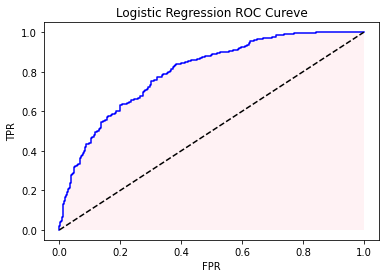

In [54]:
from sklearn.metrics import auc
plt.plot(fpr_lgm, tpr_lgm, 'b-')
plt.fill_between(fpr_lgm, tpr_lgm, 0, facecolor = 'pink', alpha = 0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC Cureve')
plt.show()

In [62]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [63]:
naive_predict = naive.predict(x_test)

In [64]:
print(classification_report(y_test,naive_predict, target_names = ["실패", "성공"]))

              precision    recall  f1-score   support

          실패       0.68      0.53      0.60       100
          성공       0.76      0.86      0.81       177

    accuracy                           0.74       277
   macro avg       0.72      0.69      0.70       277
weighted avg       0.73      0.74      0.73       277



In [65]:
print(confusion_matrix(y_test, naive_predict))

[[ 53  47]
 [ 25 152]]


In [66]:
fpr_naive, tpr_naive, thresholds_naive = roc_curve(y, naive.predict_proba(x)[:, 1])

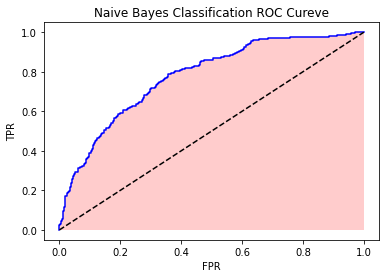

In [67]:
plt.plot(fpr_naive, tpr_naive, 'b-', label = 'naive')
plt.fill_between(fpr_naive, tpr_naive, 0, facecolor = 'red', alpha = 0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Naive Bayes Classification ROC Cureve')
plt.show()

In [68]:
print("naive auc : ", auc(fpr_naive, tpr_naive))

naive auc :  0.7765360545056572


In [55]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [56]:
tree_predict = tree.predict(x_test)

In [57]:
print(classification_report(y_test, tree_predict, target_names = ["실패", "성공"]))

              precision    recall  f1-score   support

          실패       0.70      0.61      0.65       100
          성공       0.79      0.85      0.82       177

    accuracy                           0.77       277
   macro avg       0.75      0.73      0.74       277
weighted avg       0.76      0.77      0.76       277



In [58]:
print(confusion_matrix(y_test, tree_predict))

[[ 61  39]
 [ 26 151]]


In [59]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y, tree.predict_proba(x)[:, 1])
print('tree auc : ', auc(fpr_tree, tpr_tree))

tree auc :  0.7583032750665393


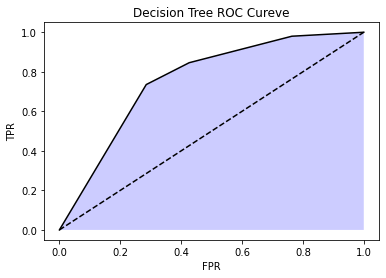

In [61]:
plt.plot(fpr_tree, tpr_tree, 'k-', label = 'tree')
plt.fill_between(fpr_tree, tpr_tree, 0, facecolor = 'blue', alpha = 0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree ROC Cureve')
plt.show()

In [26]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y, tree.predict_proba(x)[:, 1])

In [27]:
from sklearn.metrics import auc

print("naive auc : ", auc(fpr_naive, tpr_naive))
print("tree auc : ", auc(fpr_tree, tpr_tree))
print("lgm auc : ", auc(fpr_lgm, tpr_lgm))

naive auc :  0.7765360545056572
tree auc :  0.7583032750665393
lgm auc :  0.7994985150702386


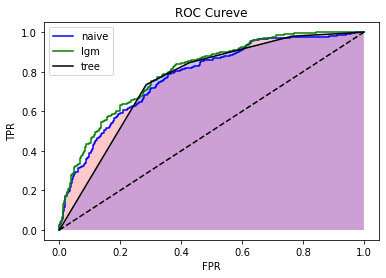

In [29]:
plt.plot(fpr_naive, tpr_naive, 'b-', label = 'naive')
plt.fill_between(fpr_naive, tpr_naive, 0, facecolor = 'red', alpha = 0.2)
plt.plot(fpr_lgm, tpr_lgm, 'g-', label = 'lgm')
plt.fill_between(fpr_lgm, tpr_lgm, 0, facecolor = 'pink', alpha = 0.2)
plt.plot(fpr_tree, tpr_tree, 'k-', label = 'tree')
plt.fill_between(fpr_tree, tpr_tree, 0, facecolor = 'blue', alpha = 0.2)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Cureve')
plt.show()

- 변수 중요도

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

from sklearn.model_selection import cross_val_score

logistic = LogisticRegression(random_state = 7054)
logistic_fit = logistic.fit(X_train_scaled, y_train)
cross_val_score(lgm,X_train_scaled, y_train, cv=5)
logistic_fit.score(x_test, y_test)
print(classification_report(y_test, logistic_fit.predict(X_test_scaled)))

feature_importance_lr = pd.DataFrame(zip(startup.columns.values,logistic_fit.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

              precision    recall  f1-score   support

           0       0.72      0.42      0.53       100
           1       0.74      0.91      0.81       177

    accuracy                           0.73       277
   macro avg       0.73      0.66      0.67       277
weighted avg       0.73      0.73      0.71       277



In [78]:
df = pd.DataFrame()
df["Feature"] = startup.columns.values
df["Importance"] = logistic.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [79]:
import statsmodels.api as sm
model = sm.formula.glm("status ~ age_first_funding_year + age_last_funding_year + relationships + funding_rounds + is_ecommerce + milestones + avg_participants + is_top500", startup, family = sm.families.Binomial()).fit()
print(model.summary())
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  923
Model:                            GLM   Df Residuals:                      914
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -471.30
Date:                Thu, 09 Dec 2021   Deviance:                       942.60
Time:                        21:48:34   Pearson chi2:                 1.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2